In [1]:
# Supress warnings 
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing Pandas and NumPy
import pandas as pd
import numpy as np

In [3]:
# Importing all datasets
churn_df = pd.read_csv('churn_data.csv')

In [4]:
customer_df = pd.read_csv('customer_data.csv')

In [5]:
internet_df = pd.read_csv('internet_data.csv')

In [6]:
# Merging on 'Customer_ID'
df_1 = pd.merge(churn_df, customer_df, how = 'inner', on = 'customerID')

In [7]:
# Final dataframe with all predictor variables
telecom = pd.merge(df_1, internet_df, how = 'inner', on = 'customerID')

In [8]:
# let's see the head of our master dataset
telecom.head(10)

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,...,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,...,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,...,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,...,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,...,No,No,No,Fiber optic,No,No,No,No,No,No
5,9305-CDSKC,8,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,Female,...,No,No,Yes,Fiber optic,No,No,Yes,No,Yes,Yes
6,1452-KIOVK,22,Yes,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No,Male,...,No,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No
7,6713-OKOMC,10,No,Month-to-month,No,Mailed check,29.75,301.9,No,Female,...,No,No,No phone service,DSL,Yes,No,No,No,No,No
8,7892-POOKP,28,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,Female,...,Yes,No,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes
9,6388-TABGU,62,Yes,One year,No,Bank transfer (automatic),56.15,3487.95,No,Male,...,No,Yes,No,DSL,Yes,Yes,No,No,No,No


In [9]:
telecom.shape

(7043, 21)

In [10]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   PhoneService      7043 non-null   object 
 3   Contract          7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   Churn             7043 non-null   object 
 9   gender            7043 non-null   object 
 10  SeniorCitizen     7043 non-null   int64  
 11  Partner           7043 non-null   object 
 12  Dependents        7043 non-null   object 
 13  MultipleLines     7043 non-null   object 
 14  InternetService   7043 non-null   object 
 15  OnlineSecurity    7043 non-null   object 
 16  OnlineBackup      7043 non-null   object 


In [11]:
telecom.describe()

,tenure,MonthlyCharges,SeniorCitizen
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,0.162147
std,24.559481,30.090047,0.368612
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,0.000000
50%,29.000000,70.350000,0.000000
75%,55.000000,89.850000,0.000000
max,72.000000,118.750000,1.000000


In [12]:
# List of variables to map
varlist = ['PhoneService','PaperlessBilling','Churn','Partner','Dependents']

# Defining the map function
def binary_map(x) :
    return x.map({'Yes' : 1, 'No' : 0})

# Applying the function to housing list
telecom[varlist] = telecom[varlist].apply(binary_map)

In [13]:
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,...,1,0,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,Male,...,0,0,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,...,0,0,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,...,0,0,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,...,0,0,No,Fiber optic,No,No,No,No,No,No


In [14]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(telecom[['Contract','PaymentMethod','gender','InternetService']], drop_first = True)

In [15]:
# Applying the results to the master DataFrame
telecom = pd.concat([telecom,dummy1], axis = 1)

In [16]:
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,StreamingTV,StreamingMovies,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,InternetService_No
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,...,No,No,False,False,False,True,False,False,False,False
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,Male,...,No,No,True,False,False,False,True,True,False,False
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,...,No,No,False,False,False,False,True,True,False,False
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,...,No,No,True,False,False,False,False,True,False,False
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,...,No,No,False,False,False,True,False,False,True,False


In [17]:
# creating dummy variables for the remaining categorical variables and dropping the level with big name

# Creating dummy variables for variables 'MultipleLines'
ml = pd.get_dummies(telecom['MultipleLines'], prefix = 'MultipleLines')
# Dropping MultipleLines_No phone service column
ml1 = ml.drop(['MultipleLines_No phone service'], axis = 1)
# Adding the results to the master DataFrame
telecom = pd.concat([telecom,ml1], axis = 1)

In [18]:
# Creating dummy variables for the variable 'OnlineSecurity'
os = pd.get_dummies(telecom['OnlineSecurity'], prefix = 'OnlineSecurity')
os1 = os.drop(['OnlineSecurity_No internet service'], axis = 1)
# Adding the results to Master DataFrame
telecom = pd.concat([telecom,os1], axis = 1)

In [19]:
# Creating dummy variables for the variable 'OnlineBackup'
ob = pd.get_dummies(telecom['OnlineBackup'], prefix = 'OnlineBackup')
ob1 = ob.drop(['OnlineBackup_No internet service'], axis = 1)
# Adding the results to Master DataFrame
telecom = pd.concat([telecom,ob1], axis = 1)

In [20]:
# Creating dummy variables for the variable 'DeviceProtection'
dp = pd.get_dummies(telecom['DeviceProtection'], prefix = 'DeviceProtection')
dp1 = dp.drop(['DeviceProtection_No internet service'], axis = 1)
# Adding the results to Master DataFrame
telecom = pd.concat([telecom,dp1], axis = 1)

In [21]:
# Creating dummy variables for the variable 'TechSupport'
ts = pd.get_dummies(telecom['TechSupport'], prefix = 'TechSupport')
ts1 = ts.drop(['TechSupport_No internet service'], axis = 1)
# Adding the results to Master DataFrame
telecom = pd.concat([telecom,ts1], axis = 1)

In [22]:
# Creating dummy variables for the variable 'StreamingTV'
st = pd.get_dummies(telecom['StreamingTV'], prefix = 'StreamingTV')
st1 = st.drop(['StreamingTV_No internet service'], axis = 1)
# Adding the results to Master DataFrame
telecom = pd.concat([telecom,st1], axis = 1)

In [23]:
# Creating dummy variables for the variable 'StreamingMovies'
sm = pd.get_dummies(telecom['StreamingMovies'], prefix = 'StreamingMovies')
sm1 = sm.drop(['StreamingMovies_No internet service'], axis = 1)
# Adding the results to Master DataFrame
telecom = pd.concat([telecom,sm1], axis = 1)

In [24]:
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,...,False,True,True,False,True,False,True,False,True,False
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,Male,...,True,False,False,True,True,False,True,False,True,False
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,...,False,True,True,False,True,False,True,False,True,False
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,...,True,False,False,True,False,True,True,False,True,False
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,...,True,False,True,False,True,False,True,False,True,False


In [25]:
telecom.columns

Index(['customerID', 'tenure', 'PhoneService', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn', 'gender',
       'SeniorCitizen', 'Partner', 'Dependents', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'gender_Male', 'InternetService_Fiber optic', 'InternetService_No',
       'MultipleLines_No', 'MultipleLines_Yes', 'OnlineSecurity_No',
       'OnlineSecurity_Yes', 'OnlineBackup_No', 'OnlineBackup_Yes',
       'DeviceProtection_No', 'DeviceProtection_Yes', 'TechSupport_No',
       'TechSupport_Yes', 'StreamingTV_No', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_Yes'],
      dtype='object')

In [26]:
telecom.shape

(7043, 43)

In [27]:
# We have created dummies for the below variables, so we can drop them
telecom = telecom.drop(['Contract','PaymentMethod','gender','MultipleLines','InternetService','OnlineSecurity',
                        'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies'], axis = 1)

In [28]:
# The variable was imported as a string we need to convert it to float

# Convert 'TotalCharges' to numeric
telecom['TotalCharges'] = pd.to_numeric(telecom['TotalCharges'], errors = 'coerce')

# Check the conversion
print(telecom['TotalCharges'].dtypes)

float64


In [29]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7043 non-null   object 
 1   tenure                                 7043 non-null   int64  
 2   PhoneService                           7043 non-null   int64  
 3   PaperlessBilling                       7043 non-null   int64  
 4   MonthlyCharges                         7043 non-null   float64
 5   TotalCharges                           7032 non-null   float64
 6   Churn                                  7043 non-null   int64  
 7   SeniorCitizen                          7043 non-null   int64  
 8   Partner                                7043 non-null   int64  
 9   Dependents                             7043 non-null   int64  
 10  Contract_One year                      7043 non-null   bool   
 11  Cont

In [30]:
# Checking for outliers in the continuous variables
num_telecom = telecom[['tenure','MonthlyCharges','SeniorCitizen','TotalCharges']]

In [31]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
num_telecom.describe(percentiles = [.25, .50, .75, .90, .95, .99])

,tenure,MonthlyCharges,SeniorCitizen,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,0.162147,2283.300441
std,24.559481,30.090047,0.368612,2266.771362
min,0.000000,18.250000,0.000000,18.800000
25%,9.000000,35.500000,0.000000,401.450000
50%,29.000000,70.350000,0.000000,1397.475000
75%,55.000000,89.850000,0.000000,3794.737500
90%,69.000000,102.600000,1.000000,5976.640000
95%,72.000000,107.400000,1.000000,6923.590000
99%,72.000000,114.729000,1.000000,8039.883000


In [32]:
telecom.isnull().sum()

customerID                                0
tenure                                    0
PhoneService                              0
PaperlessBilling                          0
MonthlyCharges                            0
TotalCharges                             11
Churn                                     0
SeniorCitizen                             0
Partner                                   0
Dependents                                0
Contract_One year                         0
Contract_Two year                         0
PaymentMethod_Credit card (automatic)     0
PaymentMethod_Electronic check            0
PaymentMethod_Mailed check                0
gender_Male                               0
InternetService_Fiber optic               0
InternetService_No                        0
MultipleLines_No                          0
MultipleLines_Yes                         0
OnlineSecurity_No                         0
OnlineSecurity_Yes                        0
OnlineBackup_No                 

In [33]:
# Checking the percentage of missing values
round(100*(telecom.isnull().sum()/len(telecom.index)),2)

customerID                               0.00
tenure                                   0.00
PhoneService                             0.00
PaperlessBilling                         0.00
MonthlyCharges                           0.00
TotalCharges                             0.16
Churn                                    0.00
SeniorCitizen                            0.00
Partner                                  0.00
Dependents                               0.00
Contract_One year                        0.00
Contract_Two year                        0.00
PaymentMethod_Credit card (automatic)    0.00
PaymentMethod_Electronic check           0.00
PaymentMethod_Mailed check               0.00
gender_Male                              0.00
InternetService_Fiber optic              0.00
InternetService_No                       0.00
MultipleLines_No                         0.00
MultipleLines_Yes                        0.00
OnlineSecurity_No                        0.00
OnlineSecurity_Yes                

In [34]:
# Removing NaN TotalCharges 
telecom = telecom[~np.isnan(telecom['TotalCharges'])]

In [35]:
telecom.isnull().sum()

customerID                               0
tenure                                   0
PhoneService                             0
PaperlessBilling                         0
MonthlyCharges                           0
TotalCharges                             0
Churn                                    0
SeniorCitizen                            0
Partner                                  0
Dependents                               0
Contract_One year                        0
Contract_Two year                        0
PaymentMethod_Credit card (automatic)    0
PaymentMethod_Electronic check           0
PaymentMethod_Mailed check               0
gender_Male                              0
InternetService_Fiber optic              0
InternetService_No                       0
MultipleLines_No                         0
MultipleLines_Yes                        0
OnlineSecurity_No                        0
OnlineSecurity_Yes                       0
OnlineBackup_No                          0
OnlineBacku

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
# Putting feature variable to X
X = telecom.drop(['Churn','customerID'], axis = 1)
X.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,1,0,1,29.85,29.85,0,1,0,False,False,...,False,True,True,False,True,False,True,False,True,False
1,34,1,0,56.95,1889.50,0,0,0,True,False,...,True,False,False,True,True,False,True,False,True,False
2,2,1,1,53.85,108.15,0,0,0,False,False,...,False,True,True,False,True,False,True,False,True,False
3,45,0,0,42.30,1840.75,0,0,0,True,False,...,True,False,False,True,False,True,True,False,True,False
4,2,1,1,70.70,151.65,0,0,0,False,False,...,True,False,True,False,True,False,True,False,True,False


In [38]:
# Putting response variable to y
y = telecom['Churn']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [39]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [40]:
from sklearn.preprocessing import StandardScaler

In [41]:
scaler = StandardScaler()
X_train[['tenure','MonthlyCharges','TotalCharges']] = scaler.fit_transform(X_train[['tenure','MonthlyCharges','TotalCharges']])

In [42]:
# Checking the Churn rate
churn = (sum(telecom['Churn'])/len(telecom['Churn'].index))*100
churn

26.578498293515356

In [43]:
telecom['Churn'].value_counts()

Churn
0    5163
1    1869
Name: count, dtype: int64

In [44]:
# Importing Matplotlib and Seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

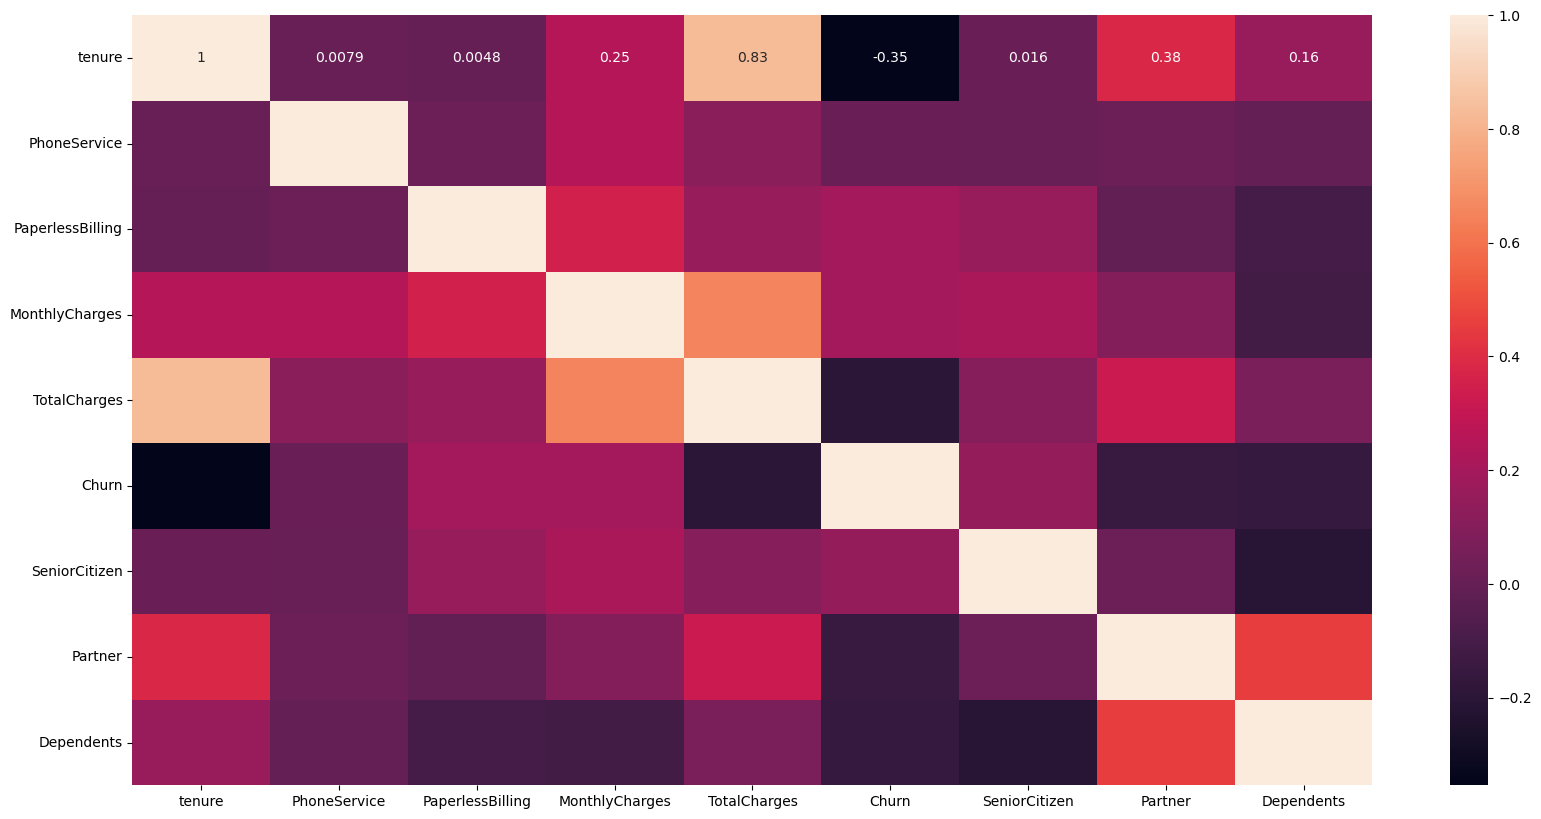

In [45]:
# Let's see the correlation matrix
plt.figure(figsize = (20,10)) # Size of the figure
num_telecom = telecom.select_dtypes(include=[float, int])
sns.heatmap(num_telecom.corr(),annot = True)
plt.show()

In [46]:
X_train = X_train.drop(['MultipleLines_No','OnlineSecurity_No','OnlineBackup_No','DeviceProtection_No','TechSupport_No',
                      'StreamingTV_No','StreamingMovies_No'], axis = 1)
X_test = X_test.drop(['MultipleLines_No','OnlineSecurity_No','OnlineBackup_No','DeviceProtection_No','TechSupport_No',
                      'StreamingTV_No','StreamingMovies_No'], axis = 1)

In [47]:
import statsmodels.api as sm

In [48]:
# Logistic Regression Model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train.select_dtypes(include = ['float','int']))), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4913
Model Family:                Binomial   Df Model:                            8
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2120.0
Date:                Wed, 19 Jun 2024   Deviance:                       4240.0
Time:                        14:55:15   Pearson chi2:                 5.48e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.2501
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -1.2142      0.152     -7.976      0.000      -1.513      -0.916
tenure              -1.6935      0.169     -9.998      0.000      -2.026      -1.362
PhoneService        -0.8236      0.143     -5.756      0.000      -1.104      -0.543
PaperlessBilling     0.5198      0.086      6.043      0.000       0.351       0.688
MonthlyCharges       0.8956      0.070     12.833      0.000       0.759       1.032
TotalCharges         0.3370      0.175      1.927      0.054      -0.006       0.680
SeniorCitizen        0.6667      0.098      6.768      0.000       0.474       0.860
Partner              0.0927      0.091      1.020      0.308      -0.085       0.271
Dependents          -0.3250      0.103     -3.144      0.002      -0.528      -0.122
====================================================================================
"""

In [49]:
help(sm.GLM)

Help on class GLM in module statsmodels.genmod.generalized_linear_model:

class GLM(statsmodels.base.model.LikelihoodModel)
 |  GLM(endog, exog, family=None, offset=None, exposure=None, freq_weights=None, var_weights=None, missing='none', **kwargs)
 |  
 |  Generalized Linear Models
 |  
 |  GLM inherits from statsmodels.base.model.LikelihoodModel
 |  
 |  Parameters
 |  ----------
 |  endog : array_like
 |      1d array of endogenous response variable.  This array can be 1d or 2d.
 |      Binomial family models accept a 2d array with two columns. If
 |      supplied, each observation is expected to be [success, failure].
 |  exog : array_like
 |      A nobs x k array where `nobs` is the number of observations and `k`
 |      is the number of regressors. An intercept is not included by default
 |      and should be added by the user (models specified using a formula
 |      include an intercept by default). See `statsmodels.tools.add_constant`.
 |  family : family class instance
 |    

In [50]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()

In [51]:
from sklearn.feature_selection import RFE
rfe=RFE(estimator=logreg, n_features_to_select=15)
rfe=rfe.fit(X_train, y_train)

In [52]:
help(RFE)

Help on class RFE in module sklearn.feature_selection._rfe:

class RFE(sklearn.feature_selection._base.SelectorMixin, sklearn.base.MetaEstimatorMixin, sklearn.base.BaseEstimator)
 |  RFE(estimator, *, n_features_to_select=None, step=1, verbose=0, importance_getter='auto')
 |  
 |  Feature ranking with recursive feature elimination.
 |  
 |  Given an external estimator that assigns weights to features (e.g., the
 |  coefficients of a linear model), the goal of recursive feature elimination
 |  (RFE) is to select features by recursively considering smaller and smaller
 |  sets of features. First, the estimator is trained on the initial set of
 |  features and the importance of each feature is obtained either through
 |  any specific attribute or callable.
 |  Then, the least important features are pruned from current set of features.
 |  That procedure is recursively repeated on the pruned set until the desired
 |  number of features to select is eventually reached.
 |  
 |  Read more in

In [53]:
rfe.support_

array([ True, False,  True,  True,  True,  True, False, False,  True,
        True,  True, False,  True, False,  True,  True,  True, False,
       False, False,  True,  True,  True])

In [54]:
rfe.ranking_

array([1, 3, 1, 1, 1, 1, 7, 6, 1, 1, 1, 4, 1, 8, 1, 1, 1, 2, 5, 9, 1, 1,
       1])

In [55]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('tenure', True, 1),
 ('PhoneService', False, 3),
 ('PaperlessBilling', True, 1),
 ('MonthlyCharges', True, 1),
 ('TotalCharges', True, 1),
 ('SeniorCitizen', True, 1),
 ('Partner', False, 7),
 ('Dependents', False, 6),
 ('Contract_One year', True, 1),
 ('Contract_Two year', True, 1),
 ('PaymentMethod_Credit card (automatic)', True, 1),
 ('PaymentMethod_Electronic check', False, 4),
 ('PaymentMethod_Mailed check', True, 1),
 ('gender_Male', False, 8),
 ('InternetService_Fiber optic', True, 1),
 ('InternetService_No', True, 1),
 ('MultipleLines_Yes', True, 1),
 ('OnlineSecurity_Yes', False, 2),
 ('OnlineBackup_Yes', False, 5),
 ('DeviceProtection_Yes', False, 9),
 ('TechSupport_Yes', True, 1),
 ('StreamingTV_Yes', True, 1),
 ('StreamingMovies_Yes', True, 1)]

In [56]:
col=X_train.columns[rfe.support_]

In [57]:
X_train.columns[~rfe.support_]

Index(['PhoneService', 'Partner', 'Dependents',
       'PaymentMethod_Electronic check', 'gender_Male', 'OnlineSecurity_Yes',
       'OnlineBackup_Yes', 'DeviceProtection_Yes'],
      dtype='object')

In [58]:
X_train_sm=sm.add_constant(X_train[col])
logm2=sm.GLM(y_train, X_train_sm.select_dtypes(include = ['float','int']), family=sm.families.Binomial())
res=logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4916
Model Family:                Binomial   Df Model:                            5
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2141.1
Date:                Wed, 19 Jun 2024   Deviance:                       4282.1
Time:                        14:55:16   Pearson chi2:                 5.37e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.2436
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -2.0034      0.079    -25.300      0.000      -2.159      -1.848
tenure              -1.6200      0.166     -9.782      0.000      -1.945      -1.295
PaperlessBilling     0.5534      0.085      6.474      0.000       0.386       0.721
MonthlyCharges       0.8047      0.066     12.218      0.000       0.676       0.934
TotalCharges         0.2879      0.173      1.663      0.096      -0.051       0.627
SeniorCitizen        0.7525      0.097      7.796      0.000       0.563       0.942
====================================================================================
"""

In [59]:
X_train_sm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4922 entries, 879 to 5649
Data columns (total 16 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   const                                  4922 non-null   float64
 1   tenure                                 4922 non-null   float64
 2   PaperlessBilling                       4922 non-null   int64  
 3   MonthlyCharges                         4922 non-null   float64
 4   TotalCharges                           4922 non-null   float64
 5   SeniorCitizen                          4922 non-null   int64  
 6   Contract_One year                      4922 non-null   bool   
 7   Contract_Two year                      4922 non-null   bool   
 8   PaymentMethod_Credit card (automatic)  4922 non-null   bool   
 9   PaymentMethod_Mailed check             4922 non-null   bool   
 10  InternetService_Fiber optic            4922 non-null   bool   
 11  Interne

In [60]:
print(X_train_sm.shape)
print(res.params.shape)

(4922, 16)
(6,)


In [61]:
y_train_pred=res.predict(X_train_sm.select_dtypes(include = ['float','int']))
print(y_train_pred[:10])

879     0.137808
5790    0.086987
6498    0.694485
880     0.748772
2784    0.747536
3874    0.332171
5387    0.212115
6623    0.804769
4465    0.136758
5364    0.528538
dtype: float64


In [62]:
help(res.predict)

Help on method predict in module statsmodels.base.model:

predict(exog=None, transform=True, *args, **kwargs) method of statsmodels.genmod.generalized_linear_model.GLMResults instance
    Call self.model.predict with self.params as the first argument.
    
    Parameters
    ----------
    exog : array_like, optional
        The values for which you want to predict. see Notes below.
    transform : bool, optional
        If the model was fit via a formula, do you want to pass
        exog through the formula. Default is True. E.g., if you fit
        a model y ~ log(x1) + log(x2), and transform is True, then
        you can pass a data structure that contains x1 and x2 in
        their original form. Otherwise, you'd need to log the data
        first.
    *args
        Additional arguments to pass to the model, see the
        predict method of the model for the details.
    **kwargs
        Additional keywords arguments to pass to the model, see the
        predict method of the mode

In [63]:
y_train_pred=y_train_pred.values.reshape(-1)
print(y_train_pred[:10])

[0.13780805 0.08698681 0.6944848  0.74877232 0.74753558 0.33217144
 0.21211503 0.80476881 0.13675767 0.52853788]


In [64]:
y_train_pred_final=pd.DataFrame({'Churn':y_train.values, 'Churn_prob': y_train_pred})
y_train_pred_final['CustID']=y_train.index
y_train_pred_final.head()

,Churn,Churn_prob,CustID
0,0,0.137808,879
1,0,0.086987,5790
2,1,0.694485,6498
3,1,0.748772,880
4,1,0.747536,2784


In [65]:
y_train.values

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [66]:
y_train_pred_final['predicted']=y_train_pred_final.Churn_prob.map(lambda x:1 if x>0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_prob,CustID,predicted
0,0,0.137808,879,0
1,0,0.086987,5790,0
2,1,0.694485,6498,1
3,1,0.748772,880,1
4,1,0.747536,2784,1


In [67]:
y_train_pred_final['Churn'].value_counts()

Churn
0    3635
1    1287
Name: count, dtype: int64

In [68]:
y_train_pred_final['predicted'].value_counts()

predicted
0    4007
1     915
Name: count, dtype: int64

In [69]:
churn=(sum(y_train_pred_final['predicted'])/len(y_train_pred_final['predicted'].index))*100

In [70]:
churn

18.590004063388864

In [71]:
from sklearn import metrics

In [72]:
confusion=metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted)
print(confusion)

[[3310  325]
 [ 697  590]]


In [73]:
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.7923608289313288


In [74]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [75]:
print(X_train[col].dtypes)

tenure                                   float64
PaperlessBilling                           int64
MonthlyCharges                           float64
TotalCharges                             float64
SeniorCitizen                              int64
Contract_One year                           bool
Contract_Two year                           bool
PaymentMethod_Credit card (automatic)       bool
PaymentMethod_Mailed check                  bool
InternetService_Fiber optic                 bool
InternetService_No                          bool
MultipleLines_Yes                           bool
TechSupport_Yes                             bool
StreamingTV_Yes                             bool
StreamingMovies_Yes                         bool
dtype: object


In [76]:
print((~np.isfinite(X_train[col])).sum())

tenure                                   0
PaperlessBilling                         0
MonthlyCharges                           0
TotalCharges                             0
SeniorCitizen                            0
Contract_One year                        0
Contract_Two year                        0
PaymentMethod_Credit card (automatic)    0
PaymentMethod_Mailed check               0
InternetService_Fiber optic              0
InternetService_No                       0
MultipleLines_Yes                        0
TechSupport_Yes                          0
StreamingTV_Yes                          0
StreamingMovies_Yes                      0
dtype: int64


In [77]:
print(X_train[col].isnull().sum())

tenure                                   0
PaperlessBilling                         0
MonthlyCharges                           0
TotalCharges                             0
SeniorCitizen                            0
Contract_One year                        0
Contract_Two year                        0
PaymentMethod_Credit card (automatic)    0
PaymentMethod_Mailed check               0
InternetService_Fiber optic              0
InternetService_No                       0
MultipleLines_Yes                        0
TechSupport_Yes                          0
StreamingTV_Yes                          0
StreamingMovies_Yes                      0
dtype: int64


In [78]:
vif=pd.DataFrame()
vif["Features"]=X_train[col].select_dtypes(include=["float","int"]).columns

In [79]:
vif["VIF"]=[variance_inflation_factor(X_train[col].select_dtypes(include=["float","int"]).values,i) for i in range(X_train[col].select_dtypes(include=["float","int"]).shape[1])]
vif["VIF"]=round(vif["VIF"],2)
vif=vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
3,TotalCharges,9.61
0,tenure,5.89
2,MonthlyCharges,3.34
1,PaperlessBilling,1.24
4,SeniorCitizen,1.22


In [80]:
col = col.drop('TotalCharges')
col

Index(['tenure', 'PaperlessBilling', 'MonthlyCharges', 'SeniorCitizen',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Mailed check',
       'InternetService_Fiber optic', 'InternetService_No',
       'MultipleLines_Yes', 'TechSupport_Yes', 'StreamingTV_Yes',
       'StreamingMovies_Yes'],
      dtype='object')

In [81]:
X_train_sm=sm.add_constant(X_train[col])
logm2=sm.GLM(y_train, X_train_sm.select_dtypes(include = ['float','int']), family=sm.families.Binomial())
res=logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4917
Model Family:                Binomial   Df Model:                            4
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2142.5
Date:                Wed, 19 Jun 2024   Deviance:                       4284.9
Time:                        14:55:16   Pearson chi2:                 5.09e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.2432
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -1.9622      0.074    -26.426      0.000      -2.108      -1.817
tenure              -1.3611      0.051    -26.727      0.000      -1.461      -1.261
PaperlessBilling     0.5471      0.085      6.409      0.000       0.380       0.714
MonthlyCharges       0.8773      0.050     17.529      0.000       0.779       0.975
SeniorCitizen        0.7539      0.097      7.794      0.000       0.564       0.944
====================================================================================
"""

In [82]:
y_train_pred=res.predict(X_train_sm.select_dtypes(include = ['float','int']))
print(y_train_pred[:10])

879     0.149505
5790    0.096371
6498    0.699693
880     0.760768
2784    0.757702
3874    0.326683
5387    0.201157
6623    0.806761
4465    0.146593
5364    0.536561
dtype: float64


In [83]:
y_train_pred=y_train_pred.values.reshape(-1)
print(y_train_pred[:10])

[0.14950543 0.09637127 0.69969285 0.76076771 0.75770214 0.32668311
 0.20115736 0.80676081 0.14659261 0.53656139]


In [84]:
y_train_pred_final['Churn_prob']=y_train_pred

In [85]:
y_train_pred_final['predicted']=y_train_pred_final.Churn_prob.map(lambda x:1 if x>0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_prob,CustID,predicted
0,0,0.149505,879,0
1,0,0.096371,5790,0
2,1,0.699693,6498,1
3,1,0.760768,880,1
4,1,0.757702,2784,1


In [86]:
y_train_pred_final['Churn'].value_counts()

Churn
0    3635
1    1287
Name: count, dtype: int64

In [87]:
churn=(sum(y_train_pred_final['predicted'])/len(y_train_pred_final['predicted'].index))*100

In [88]:
churn

18.54937017472572

In [89]:
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.7915481511580659


In [90]:
vif=pd.DataFrame()
vif["Features"]=X_train[col].select_dtypes(include=["float","int"]).columns
vif["VIF"]=[variance_inflation_factor(X_train[col].select_dtypes(include=["float","int"]).values,i) for i in range(X_train[col].select_dtypes(include=["float","int"]).shape[1])]
vif["VIF"]=round(vif["VIF"],2)
vif=vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
1,PaperlessBilling,1.24
3,SeniorCitizen,1.22
2,MonthlyCharges,1.15
0,tenure,1.07


In [91]:
confusion=metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted)
print(confusion)

[[3309  326]
 [ 700  587]]


In [92]:
TP=confusion[1,1]
TN=confusion[0,0]
FP=confusion[0,1]
FN=confusion[1,0]

In [93]:
#sensitifity
TP/float(TP+FN)

0.4560994560994561

In [94]:
#Specificity
TN/float(TN+FP)

0.9103163686382394

In [95]:
#precision
TP/float(TP+FP)

0.6429353778751369

In [96]:
#recall
TP/float(TP+FN)

0.4560994560994561

In [97]:
#ROC Curve
def draw_roc(actual, probs):
    fpr, tpr, thresholds=metrics.roc_curve(actual, probs, drop_intermediate=False)
    auc_score=metrics.roc_auc_score(actual, probs)
    plt.figure(figsize=(5,5))
    plt.plot(fpr, tpr, label='ROC curve (area=%0.2f)'%auc_score)
    plt.plot([0,1],[0,1],'k--')
    plt.xlim([0.0,1.0])
    plt.xlim([0.0,1.05])
    plt.xlabel('False Positive Rate or [1-True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Example')
    plt.legend(loc='lower right')
    plt.show()
    return None

In [98]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final.Churn, y_train_pred_final.Churn_prob, drop_intermediate=False)

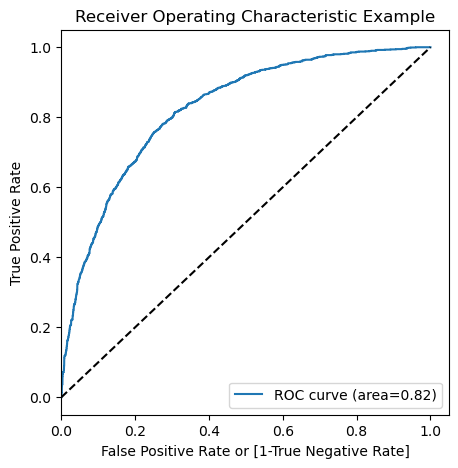

In [99]:
draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_prob)

In [100]:
#Different Probability cutoffs point
n=[float(x)/10 for x in range(10)]
for i in n:
    y_train_pred_final[i]=y_train_pred_final.Churn_prob.map(lambda x:1 if x>i else 0)
y_train_pred_final.head()

,Churn,Churn_prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.149505,879,0,1,1,0,0,0,0,0,0,0,0
1,0,0.096371,5790,0,1,0,0,0,0,0,0,0,0,0
2,1,0.699693,6498,1,1,1,1,1,1,1,1,0,0,0
3,1,0.760768,880,1,1,1,1,1,1,1,1,1,0,0
4,1,0.757702,2784,1,1,1,1,1,1,1,1,1,0,0


In [101]:
cutoff_df=pd.DataFrame(columns=['prob', 'accuracy', 'sensi', 'speci'])
from sklearn.metrics import confusion_matrix

In [102]:
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i])
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,1]+cm1[1,0])
    cutoff_df.loc[i] = [i, accuracy,speci,sensi]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.261479  0.000000  1.000000
0.1   0.1  0.554856  0.417331  0.943279
0.2   0.2  0.703779  0.656396  0.837607
0.3   0.3  0.760260  0.776891  0.713287
0.4   0.4  0.785859  0.851719  0.599845
0.5   0.5  0.791548  0.910316  0.456099
0.6   0.6  0.790735  0.953783  0.330225
0.7   0.7  0.768590  0.983219  0.162393
0.8   0.8  0.749898  0.996974  0.052059
0.9   0.9  0.738521  1.000000  0.000000


<Axes: xlabel='prob'>

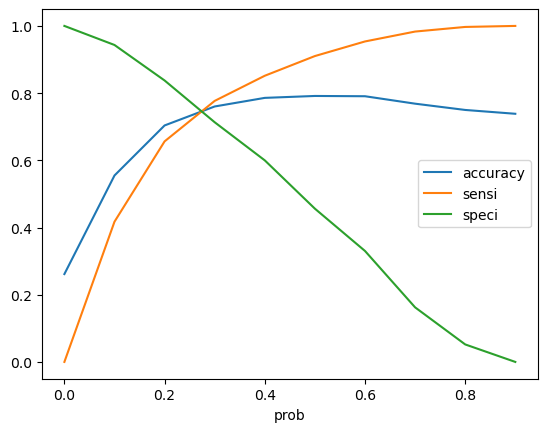

In [103]:
cutoff_df.plot.line(x='prob', y=['accuracy', 'sensi', 'speci'])

In [104]:
y_train_pred_final['final_predicted']=y_train_pred_final.Churn_prob.map(lambda x:1 if x>0.3 else 0)
y_train_pred_final.head()

,Churn,Churn_prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.149505,879,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.096371,5790,0,1,0,0,0,0,0,0,0,0,0,0
2,1,0.699693,6498,1,1,1,1,1,1,1,1,0,0,0,1
3,1,0.760768,880,1,1,1,1,1,1,1,1,1,0,0,1
4,1,0.757702,2784,1,1,1,1,1,1,1,1,1,0,0,1


In [105]:
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.final_predicted))

0.7602600568874441


In [106]:
confusion2=metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.final_predicted)
print(confusion2)

[[2824  811]
 [ 369  918]]


In [107]:
TP_2=confusion2[1,1]
TN_2=confusion2[0,0]
FP_2=confusion2[0,1]
FN_2=confusion2[1,0]

In [108]:
#sensitifity
TP_2/float(TP_2+FN_2)

0.7132867132867133

In [109]:
#Specificity
TN_2/float(TN_2+FP_2)

0.7768913342503438

In [110]:
#precision
TP_2/float(TP_2+FP_2)

0.5309427414690573

In [111]:
#recall
TP_2/float(TP_2+FN_2)

0.7132867132867133

In [112]:
cutoff_new_df=pd.DataFrame(columns=['prob', 'accuracy', 'sensi', 'speci'])
from sklearn.metrics import confusion_matrix

In [113]:
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i])
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,1]+cm1[1,0])
    cutoff_new_df.loc[i] = [i, accuracy,speci,sensi]
print(cutoff_new_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.261479  0.000000  1.000000
0.1   0.1  0.554856  0.417331  0.943279
0.2   0.2  0.703779  0.656396  0.837607
0.3   0.3  0.760260  0.776891  0.713287
0.4   0.4  0.785859  0.851719  0.599845
0.5   0.5  0.791548  0.910316  0.456099
0.6   0.6  0.790735  0.953783  0.330225
0.7   0.7  0.768590  0.983219  0.162393
0.8   0.8  0.749898  0.996974  0.052059
0.9   0.9  0.738521  1.000000  0.000000


<Axes: xlabel='prob'>

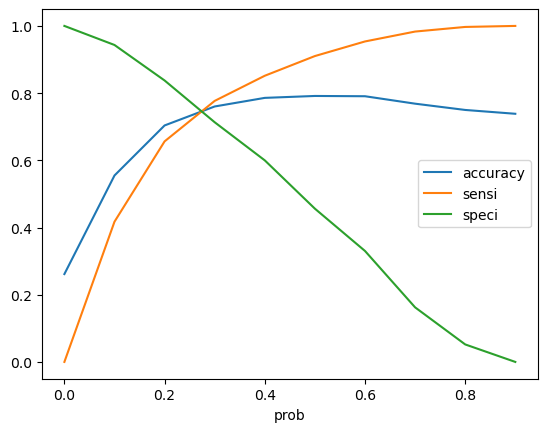

In [114]:
cutoff_new_df.plot.line(x='prob', y=['accuracy', 'sensi', 'speci'])

In [115]:
#precision and recall tradeoff
from sklearn.metrics import precision_recall_curve

In [116]:
y_train_pred_final.Churn, y_train_pred_final.predicted

(0       0
 1       0
 2       1
 3       1
 4       1
        ..
 4917    0
 4918    0
 4919    0
 4920    0
 4921    0
 Name: Churn, Length: 4922, dtype: int64,
 0       0
 1       0
 2       1
 3       1
 4       1
        ..
 4917    0
 4918    0
 4919    0
 4920    0
 4921    0
 Name: predicted, Length: 4922, dtype: int64)

In [117]:
p, r, thresholds=precision_recall_curve(y_train_pred_final.Churn, y_train_pred_final.Churn_prob)

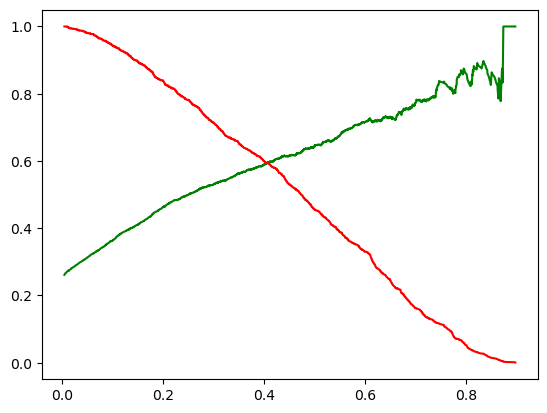

In [119]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [121]:
X_test[['tenure','MonthlyCharges','TotalCharges']] = scaler.transform(X_test[['tenure','MonthlyCharges','TotalCharges']])

In [129]:
X_test=X_test[col]
X_test.head()

,tenure,PaperlessBilling,MonthlyCharges,SeniorCitizen,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Mailed check,InternetService_Fiber optic,InternetService_No,MultipleLines_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes
942,-0.347623,1,0.499951,0,False,False,True,False,True,False,False,False,False,True
3730,0.999203,1,1.319685,0,False,False,True,False,True,False,True,False,True,True
1761,1.040015,1,-1.342374,0,False,True,True,False,False,True,True,False,False,False
2283,-1.286319,1,0.223935,0,False,False,False,True,True,False,False,False,False,False
1872,0.346196,0,-1.500335,0,False,True,False,False,False,True,False,False,False,False


In [130]:
X_test_sm=sm.add_constant(X_test)

In [132]:
y_test_pred=res.predict(X_test_sm.select_dtypes(include=['float', 'int']))

In [133]:
print(y_test_pred)

942     0.376756
3730    0.165559
1761    0.017840
2283    0.630001
1872    0.022987
          ...   
1289    0.028214
3508    0.111781
6765    0.010092
3598    0.500613
4987    0.005079
Length: 2110, dtype: float64


In [134]:
y_pred_1=pd.DataFrame(y_test_pred)

In [135]:
y_pred_1.head()

,0
942,0.376756
3730,0.165559
1761,0.017840
2283,0.630001
1872,0.022987


In [136]:
y_test_df=pd.DataFrame(y_test)

In [137]:
y_test_df['CustID']=y_test_df.index

In [138]:
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [139]:
y_pred_final=pd.concat([y_test_df, y_pred_1], axis=1)

In [140]:
y_pred_final.head()

,Churn,CustID,0
0,0,942,0.376756
1,1,3730,0.165559
2,0,1761,0.017840
3,1,2283,0.630001
4,0,1872,0.022987


In [141]:
y_pred_final=y_pred_final.rename(columns={0:'Churn_prob'})

In [145]:
y_pred_final=y_pred_final.reindex(columns=['CustID', 'Churn', 'Churn_prob'])

In [147]:
help(y_pred_final.reindex)

Help on method reindex in module pandas.core.frame:

reindex(labels=None, *, index=None, columns=None, axis: 'Axis | None' = None, method: 'ReindexMethod | None' = None, copy: 'bool | None' = None, level: 'Level | None' = None, fill_value: 'Scalar | None' = nan, limit: 'int | None' = None, tolerance=None) -> 'DataFrame' method of pandas.core.frame.DataFrame instance
    Conform DataFrame to new index with optional filling logic.
    
    Places NA/NaN in locations having no value in the previous index. A new object
    is produced unless the new index is equivalent to the current one and
    ``copy=False``.
    
    Parameters
    ----------
    
    labels : array-like, optional
        New labels / index to conform the axis specified by 'axis' to.
    index : array-like, optional
        New labels for the index. Preferably an Index object to avoid
        duplicating data.
    columns : array-like, optional
        New labels for the columns. Preferably an Index object to avoid
    

In [148]:
y_pred_final['final_predicted']=y_pred_final.Churn_prob.map(lambda x:1 if x>0.3 else 0)
y_pred_final.head()

,CustID,Churn,Churn_prob,final_predicted
0,942,0,0.376756,1
1,3730,1,0.165559,0
2,1761,0,0.017840,0
3,2283,1,0.630001,1
4,1872,0,0.022987,0


In [149]:
print(metrics.accuracy_score(y_pred_final.Churn, y_pred_final.final_predicted))

0.7336492890995261


In [150]:
confusion3=metrics.confusion_matrix(y_pred_final.Churn, y_pred_final.final_predicted)
print(confusion3)

[[1146  382]
 [ 180  402]]


In [151]:
TP_3=confusion3[1,1]
TN_3=confusion3[0,0]
FP_3=confusion3[0,1]
FN_3=confusion3[1,0]

In [152]:
#sensitifity
TP_3/float(TP_3+FN_3)

0.6907216494845361

In [154]:
#precision
TP_3/float(TP_3+FP_3)

0.5127551020408163

In [155]:
#recall
TP_3/float(TP_3+FN_3)

0.6907216494845361

In [156]:
#Entropy

In [169]:
import math

def Entropy(p, q):
    return (-p * math.log(p, 2)) - (q * math.log(q, 2))


In [170]:
Entropy(0.75, 0.25)

0.8112781244591328

In [171]:
Entropy(0.43, 0.57)

0.9858150371789198

In [172]:
Entropy(0.89, 0.11)

0.499915958164528